### MACHINE LEARN, MODELANDO ALGORITMOS DE REGRESION LINEAL

### El próximo ejemplo modelaremos un algoritmo de regresion lineal para predecir las hora de ausencia de un trabajador en dependencia de una seria de entradas(Inputs).


### Referencia de Data set
### Nombre:  Absenteeism at work - Part I
### Abstract: The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

### Link: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Lectura de los datos  en este caso un fichero en formato  csv delimitado por ";"

In [2]:
df = pd.read_csv('Absenteeism_at_work.csv',delimiter=';')

## Proceso realiza un análisis y exploración de los datos

#### Mostrar analisis de los datos con las funciones info() y decribe()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [4]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [93]:

df.head()
# en este procedimiento exploramos nuestros datos para familiarizarnos con ellos y ver que tipo de datos son para
# modificarlos en caso de ser necesario a tipo de datos numericos ya que permiten mayor eficiencia en el modelaje y
# resultado del mismo
df.drop('absent',axis=1, inplace=True)

#### la siguiente grafica nos permite visualizar la correlacion que existe entre df["Absenteeism time in hours"] y df["Disciplinary failure"]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


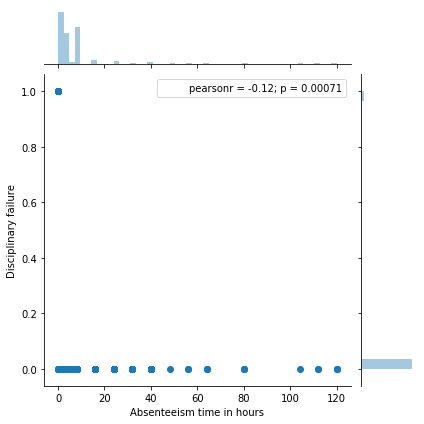

In [112]:
sb.jointplot(df["Absenteeism time in hours"],df["Disciplinary failure"])

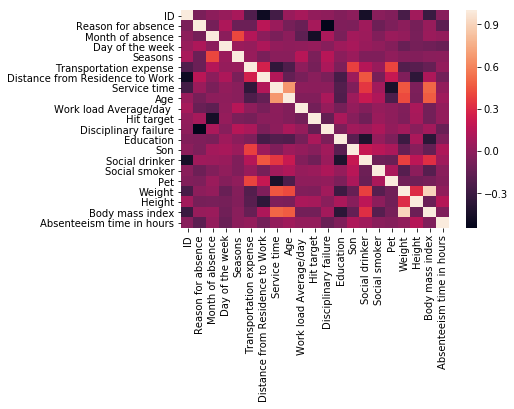

In [116]:
sb.heatmap(df.corr())

In [85]:
print("\n")
df.columns ## visualizamos las columnas para  definir las entradas que seran asignadas a la variable X 

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'absent'],
      dtype='object')

## Modelaremos a continuación los  algoritmos de clasificación enunciados en la introducción

#### de finimos la variable target es decir "y" la cual creamos anteriormente para predecir nuestro modelo y la variable "X" la cual representan nuestras entradas

In [86]:
y = df['Absenteeism time in hours'] # variable dependiente 
X = df[['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       ]] # variable independiente

#### se dividen los datos en datos para prueba y entrenamiento

In [87]:
from sklearn.cross_validation import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### se importan la libreria sklearn para implementar el modelo de regresion lineal LinealRegretion

In [118]:
from sklearn.linear_model import LinearRegression

#### se importa las librerias para las metricas de los modelos

In [119]:
from sklearn.metrics import classification_report,confusion_matrix


#### modelaje de Rregresión Lineal primero se crea el modelo

In [120]:
regresion_lineal = LinearRegression()
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


#### se procede a entrenar el modelo con la función fit a la cual se le pasa como parametros los valores de entrenamient X_train y y_train

In [121]:
regresion_lineal.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### posteriormente entrenado el modelo se realiza la predicción del mismo

In [122]:
prediccion_lineal_regret=regresion_lineal.predict(X_test)

#### luego ya podemos generar la grafia del valor residual la cual es la diferencia entre las y_test y la predicion del modelo

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


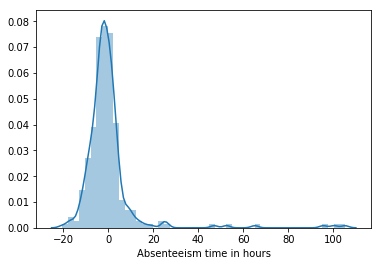

In [123]:

sb.distplot((y_test-prediccion_lineal_regret))


### a continuacion podemos dar el reporte de MSA, MSE y RMSE

#### importamos las librerias de las metricas de skitlearn

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [125]:
print("El Error absoluto medio del modelo es:", mean_absolute_error(y_test,prediccion_lineal_regret).round(2))
print("El Error cuadratico medio del modelo es:", mean_squared_error(y_test,prediccion_lineal_regret).round(2))
print("La Raiz del Error cuadratico medio del modelo es:", np.sqrt(mean_squared_error(y_test,prediccion_lineal_regret)).round(2))


El Error absoluto medio del modelo es: 6.06
El Error cuadratico medio del modelo es: 172.05
La Raiz del Error cuadratico medio del modelo es: 13.12


In [126]:
resultados = pd.DataFrame(regresion_lineal.coef_,X.columns,columns=["Coeficiente"])

In [127]:
resultados

,Coeficiente
Reason for absence,-0.495083
Month of absence,0.182021
Day of the week,-0.847169
Seasons,-0.239099
Transportation expense,0.000861
Distance from Residence to Work,-0.013439
Service time,-0.095342
Age,0.169848
Work load Average/day,0.013552
Hit target,0.189641
